# Задание 1 (1 балл)

Вы работаете продуктовым аналитиком в команде Алисы в Яндексе. В команде появилась новая идея - научить Алису рекомендовать фильмы и сериалы под настроение и вкусы пользователя.

Путь пользователя будет выглядеть так:
* Пользователь спрашивает "Алиса, порекомендуй фильм" или "Алиса, посоветуй фильм под хорошее настроение"
* Алиса задает уточняющие вопросы. Например, "Старый или новый фильм вы хотите?" или "Хотите фильм из жанра комедии?"
* По результатам Алиса рекомендует фильм с учетом вкусов пользователя

Ваша задача - понять на сколько эта фича востребована сейчас, затратив минимальные усилия на ее разработку.

Опишите как минимум два подхода, как бы вы решали эту задачу

1. Анализ существующих запросов пользователей

  Необходимо оценить, как часто пользователи Алисы обращаются к ней с вопросами, связанными с кино и сериалами.

  > *Самый простой вариант: собрать массив слов, связанных с данной тематикой и посчитать долю запросов, в которых они встречаются. Либо можно написать алгоритм машинного обучения (задача классификации для NLP), оценивающий принадлежность запроса к классу кино*

  Далее можно сравнить полученную долю с тем же показателем в других классов запросов и оценить разницу. Таким образом, сможем понять, насколько фича востребована сейчас.

2. Опрос пользователей

  Клиенты могут не знать о возможности задавать вопросы на тему кино и соответсвенно не генерировать их. Но это не значит, что фича бесполезна. Необходимо создать количественный опрос. В нем можно задать вопросы о том, насколько пользователи заинтересованы в функции рекомендации фильмов и сериалов, как часто они смотрят фильмы и сериалы и т.д.

3. Анализ поисковых запросов

  Функционал Алисы тесно связан с функционалом поисковых систем. Поэтому будет полезно понять сколько пользователей ищут информацию о фильмах и сериалах на сайте Яндекса. Может оказаться так, что рекомендательная система Кинопоиска закрывает потрнбности клиентов и новый функционал не будет востребован


# Задание 2

## 2.1 (0.5 балла)

В файле data.tsv представлены логи пользователей для стартапа по автоматической генерации рекламных объявлений, который мы рассматривали на лекции.

Напомним, как выглядит путь пользователя в этом продукте:
1. Пользователь заходит на Landing-page, на которой представлена основная информация о продукте.
2. Если его заинтересовал продукт, ему нужно зарегестрироваться, чтобы им воспользоваться.
3. Далее он попадает в Личный Кабинет, где может указать URL своего сайта и запустить для него генерацию рекламных объявлений.
4. Когда пользователь запускает генерацию, мы прокачиваем информацию с его сайта и подаем на вход генеративным нейросетям.
5. Когда генерация закончена, мы показываем готовые рекламные объявления пользователю. Далее пользователь использует эти объявления на рекламных площадках для продвижения своего бизнеса.
6. Пользователю предлагается 3 бесплатных генерации, после чего ему предлагается опатить сервис, чтобы пользоваться дальше.

Опишем события
* event_timestamp - время, когда произошло событие в формате datetime
* user_id - уникальные идентификатор пользователя
* event_name - тип события. Существуют следующие типы:
    * visit_landing - посещение лендинга
    * visit_cabinet - посещение ЛК
    * generate - запуск генерации рекламного объявления
    * results_shown - пользователь увидел результаты генерации
    * payment - пользователь оплатил сервис
* traffic_name - для событий **event_name = visit_landing** в этом поле записывается Маркетинговый канал с которого мы привлекли пользователя на наш сервис
* generation_time - для событий **event_name = generate** время в секундах, сколько длилась генерация. Если поле пустое, то генерация по каким-то причинам упала с ошибкой

Ваша задача - нарисовать воронку уникальных пользователей по основным этапам
* Пришел на лендинг
* Зарегистрировался
* Запустил генерацию
* Увидел результаты
* Оплатил

Для отрисовки воронки рекомендуем использовать библиотеку plotly

In [ ]:
import pandas as pd
df = pd.read_csv("data.tsv", sep="\t")

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
df.head()

,event_timestamp,user_id,traffic_name,event_name,generation_time
0,2023-04-14 22:07:26.718868,1c03e4d8cc9fed8257101c3a777846dc47b0c063,source1,visit_landing,NaN
1,2023-04-14 22:07:30.108109,ff04608fb50f1500a47d868c0501af8a216edf67,source1,visit_landing,NaN
2,2023-04-14 22:09:54.296346,97c81ae2f6932a87ad2e32d559039e245bd36d6c,source2,visit_landing,NaN
3,2023-04-14 22:12:23.645722,cbcfafaa952606cf103acd10efff674a8577fc31,source2,visit_landing,NaN
4,2023-04-14 22:14:33.188859,ed659c4e05070647a27cea60f295d2ee6011712e,source3,visit_landing,NaN


In [ ]:
evname_gr = df.groupby(['event_name']).user_id.nunique()
evname_gr

event_name
generate           972
payment             11
results_shown      710
visit_cabinet     4256
visit_landing    17659
Name: user_id, dtype: int64

In [ ]:
data = dict(
    number=sorted(evname_gr.values, reverse=True),
    stage=['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты', 'Оплатил'])
fig = px.funnel(data, x='number', y='stage', title='Воронка уникальных пользователей по основным этапам')
fig.show()

# 2.2 (0.5 балла)

Видно, что до этапа оплаты доходит очень мало пользователей. Давайте заменим последний этап на другой показатель - "Количество пользователей с минимум двумя успешными генерациями".
Так у нас будет больше статистики на последнем этапе. При этом, по логике продукта, этот этап должен коррелировать с оплатами.

Нарисуйте воронку, заменив последний этап на предложенный показатель.

In [ ]:
gr_gen = df[~df.generation_time.isnull()].groupby(['user_id'])['generation_time'].count()
gr_gen

user_id
0014ad19208f4f8a6e3911ee4c248d95be86ca43    1
002e21681d046388b0170cf14e719850c59f6040    1
00adb4e6b6978d3897d144471815337a57d09a09    1
00bb75ff1aa1e24dfa8cd01363609ce286b76843    1
00bf5f7a8310fa00b3910b29ad729f38682af5c3    1
                                           ..
fd23931e460cdc225c48eda67e7bf965b99eaf77    1
fd683834f2773a5a7e7122dda9a5dc5b0e4c7fc9    1
fdf93991aa60b8985dacb36dcfea1f8000d1b2ec    1
ff2837c53b785238f945c23b29f0905b41c40614    1
ff8acef9720785ea9a9363bc59e882452d7bc7c3    1
Name: generation_time, Length: 725, dtype: int64

In [ ]:
gr_gen[gr_gen >= 2].count()

148

In [ ]:
l = sorted(evname_gr.values, reverse=True)
l.pop()
l += [gr_gen[gr_gen >= 2].count()]

In [ ]:
data = dict(
    number=l,
    stage=['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты', 'Сделал >= 2 генераций'])
fig = px.funnel(data, x='number', y='stage', title='Воронка уникальных пользователей по основным этапам + 2 успешные генерации')
fig.show()

## 2.3 (1 балл)

Сейчас мы превлекаем клиентов на сайт с помощью нескольких маркетинговых компаний (колонка traffic_source). Команда маркетинга, просит вас помочь им понять, какая из рекламных компаний более выгодная: source1 или source2.

Помогите им это определить, учитывая что стоимость привлечения одного человека на лендинг для
* source1 - 2 цента
* source2 - 1 цент

и мы хотим растить последний этап воронки с предыдущего задания

Нужно не только дать ответ, но и расписать как вы к нему пришли.

Для начала построим воронку в разбивке по способу привлечения

In [ ]:
# Достаем пользователей, который были привлечены нужной кампанией
user_s1 = set(df[df.traffic_name.isin(['source1'])].user_id)
user_s2 = set(df[df.traffic_name.isin(['source2'])].user_id)

In [ ]:
# Считаем общую воронку по каждой кампании
stat_s1 = df[df.user_id.isin(user_s1)].groupby(['event_name']).user_id.nunique()
stat_s2 = df[df.user_id.isin(user_s2)].groupby(['event_name']).user_id.nunique()

In [ ]:
# Вычисляем кол-во пользователей с 2+ генерциями в разбивке по способу привлечения
user_gen2 = set(gr_gen[gr_gen >= 2].index)
user_s1_gen2 = len(user_s1 & user_gen2)
user_s2_gen2 = len(user_s2 & user_gen2)

In [ ]:
s1 = sorted(stat_s1.values, reverse=True)
s1.pop()

s2 = sorted(stat_s2.values, reverse=True)
s2.pop()

2

In [ ]:
stages = ['Пришел на лендинг', 'Зарегистрировался', 'Запустил генерацию', 'Увидел результаты', 'Сделал >= 2 генераций']

df_source1 = pd.DataFrame(dict(number=s1 + [user_s1_gen2], stage=stages))
df_source1['source'] = 'source1'

df_source2 = pd.DataFrame(dict(number=s2 + [user_s2_gen2], stage=stages))
df_source2['source'] = 'source2'

df_gen2 = pd.concat([df_source1, df_source2], axis=0)
fig = px.funnel(df_gen2, x='number', y='stage', color='source')
fig.show()

Хотим растить последний этап воронки: Увидел результаты -> сделал минимум 2 генерации

Посчитаем конверсии для каждой кампании на этом этапе
- source1: 74 / 313 = 0,24
- source2: 28 / 115 = 0,24

Конверсии одинаковые, значит выбираем кампанию, которая дешевле



---
Важно понимать, что кампания больше всего влияет на этап привлечения, поэтому оценим конверсию из лендинга в последний этап
- source1: 74 / 6928 = 0,01 (для 1 пользователя на последнем этапе нужно примерно 100 пользователей на лендинге)
- source2: 28 / 4263 = 0,007 (для 1 пользователя на последнем этапе нужно примерно 143 пользователя на лендинге)

100 * 2 > 143 * 1

Подтвердили, что вторая кампания выгодная


## 2.4 (1 балл)

Команда хочет понимать, что движется в правильном направлении и релизы действительно улучшают показатели воронки.

Постройте линейные графики конверсий соседних этапов воронками (Лендинг -> регистрация, регистрация -> генерация и тд) со скользящим окном в одну неделю.

Для этого в каждой точке нужно взять данные за последнюю неделю и посчитать конверсии по уникальным пользователям, **впервые попавшим на наш сервис** в данном окне времени.

In [ ]:
df.head()

,event_timestamp,user_id,traffic_name,event_name,generation_time
0,2023-04-14 22:07:26.718868,1c03e4d8cc9fed8257101c3a777846dc47b0c063,source1,visit_landing,NaN
1,2023-04-14 22:07:30.108109,ff04608fb50f1500a47d868c0501af8a216edf67,source1,visit_landing,NaN
2,2023-04-14 22:09:54.296346,97c81ae2f6932a87ad2e32d559039e245bd36d6c,source2,visit_landing,NaN
3,2023-04-14 22:12:23.645722,cbcfafaa952606cf103acd10efff674a8577fc31,source2,visit_landing,NaN
4,2023-04-14 22:14:33.188859,ed659c4e05070647a27cea60f295d2ee6011712e,source3,visit_landing,NaN


In [ ]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['event_date'] = df['event_timestamp'].dt.date

In [ ]:
first_act = df.groupby('user_id')['event_date'].min()

df['first_action'] = df.user_id.apply(lambda x: first_act[x])
df.head()

,event_timestamp,user_id,traffic_name,event_name,generation_time,event_date,first_action
0,2023-04-14 22:07:26.718868,1c03e4d8cc9fed8257101c3a777846dc47b0c063,source1,visit_landing,NaN,2023-04-14,2023-04-14
1,2023-04-14 22:07:30.108109,ff04608fb50f1500a47d868c0501af8a216edf67,source1,visit_landing,NaN,2023-04-14,2023-04-14
2,2023-04-14 22:09:54.296346,97c81ae2f6932a87ad2e32d559039e245bd36d6c,source2,visit_landing,NaN,2023-04-14,2023-04-14
3,2023-04-14 22:12:23.645722,cbcfafaa952606cf103acd10efff674a8577fc31,source2,visit_landing,NaN,2023-04-14,2023-04-14
4,2023-04-14 22:14:33.188859,ed659c4e05070647a27cea60f295d2ee6011712e,source3,visit_landing,NaN,2023-04-14,2023-04-14


In [ ]:
rolling_frame = pd.DataFrame(columns=['event_date', 'visit_landing', 'visit_cabinet', 'generate', 'results_shown', 'min2gens'])

for start_date in df['event_date'].unique():
    end_date = start_date + pd.Timedelta(days=7)
    prep = df[(df['event_date'] >= start_date) & (df['event_date'] < end_date) & (df['first_action'] >= start_date) & (df['first_action'] < end_date)]
    visit_landing = prep[prep.event_name == 'visit_landing']['user_id'].nunique()
    visit_cabinet = prep[prep.event_name == 'visit_cabinet']['user_id'].nunique()
    generate = prep[prep.event_name == 'generate']['user_id'].nunique()
    results_shown = prep[prep.event_name == 'results_shown']['user_id'].nunique()

    prep_gr = prep[~prep.generation_time.isnull()].groupby(['user_id'])['generation_time'].count()
    min2gens = prep_gr[prep_gr >= 2].count()

    rolling_frame.loc[len(rolling_frame.index)] = [end_date, visit_landing, visit_cabinet, generate, results_shown, min2gens]

In [ ]:
rolling_frame.head()

,event_date,visit_landing,visit_cabinet,generate,results_shown,min2gens
0,2023-04-21,1829,403,88,57,12
1,2023-04-22,2949,642,139,91,18
2,2023-04-23,3503,759,138,90,17
3,2023-04-24,4112,916,150,103,16
4,2023-04-25,4524,1008,166,112,17


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(
    title=dict(text="Конверсии на каждом этапе воронки")
)
fig.add_traces(go.Scatter(x=rolling_frame.event_date,
                          y=rolling_frame.visit_cabinet / rolling_frame.visit_landing ,
                          mode='lines',
                          name = 'Landing to cabinet'))
fig.add_traces(go.Scatter(x=rolling_frame.event_date,
                          y=rolling_frame.generate / rolling_frame.visit_cabinet ,
                          mode='lines',
                          name = 'Cabinet to generate'))
fig.add_traces(go.Scatter(x=rolling_frame.event_date,
                          y=rolling_frame.results_shown / rolling_frame.generate ,
                          mode='lines',
                          name = 'Generate to results'))
fig.add_traces(go.Scatter(x=rolling_frame.event_date,
                          y=rolling_frame.min2gens / rolling_frame.results_shown ,
                          mode='lines',
                          name = 'Results to min2gens'))

fig.show()

# 2.5 (1 балл)

У команды появилась гипотеза, что пользователи часто не дожидаются окончания генерации, так как она длится долго (20+ секунд). Тем более, что на экране генерации пользователю показывается бесконечный спиннер и ему непонятно, есть ли какой-то прогресс в генерации или сервис давно сломался.

20 мая экран генерации поменяли. Пользователю, вместо спиннера, показывается сообщение с текстом "Спасибо за ожидание! Генерация рекламы длится до одной минуты. Еще немного и вы получите лучшие рекламные объявления"

Аналитик решил проверить, как время генерации для первого запуска пользователя влияет на его конверсию в последующую генерацию.

Ниже представлен график по данным с 20 мая.
1. Попробуйте построить такой же график
2. Напишите, как вы интерпретируете, данные на графике

In [ ]:
import datetime

In [ ]:
df_gen = df[(~df.generation_time.isnull()) & (df.first_action >= datetime.date(2023, 5, 20))].reset_index()
df_gen.drop('index', axis=1, inplace=True)

# создадим датафрейм в котором каждому юзеру соответствует таймстэмп первой генерации
first_gen_date = df_gen.groupby(['user_id']).event_timestamp.min().reset_index()
first_gen_date.columns = ['user_id', 'first_gen_date']
first_gen_date.head()

,user_id,first_gen_date
0,00bb75ff1aa1e24dfa8cd01363609ce286b76843,2023-05-31 13:10:18
1,039ea689d5d44f9b3a103adc65603c46276fb9e2,2023-05-27 13:44:25
2,054eacdb8d0d12392af1e623c2aabda1bddc7010,2023-05-28 16:51:41
3,06306043312213e265cb065413cf29c17d192bcf,2023-05-23 07:16:57
4,082a84c8a8f5239b1e98d5428471450e61f494e5,2023-05-21 16:24:25


In [ ]:
res = pd.merge(df_gen, first_gen_date,
               left_on=['user_id', 'event_timestamp'] , right_on=['user_id', 'first_gen_date'] ,
               how='inner')

res = res[['user_id', 'generation_time']]

In [ ]:
# проверим, что нигде не накосячили
res.user_id.count() == res.user_id.nunique()

True

In [ ]:
res['two_or_more_generations'] = res.user_id.apply(lambda x: x in list(gr_gen[gr_gen >= 2].reset_index()['user_id']))

In [ ]:
res.head()

,user_id,generation_time,two_or_more_generations
0,cfba57d59078c106760fce314ec8312a2bd1c262,61.0,True
1,a7e6ac113ba8c14590fdeb0b2927d45d894d9790,40.0,False
2,69232bbe25fec931ec742828fe1bdac74e1f499f,37.0,False
3,303f65a5808bcb907ffdc5e041f27dadfc86f796,76.0,False
4,99225d5dd6d190329f1af4f8515cbcce5c405994,33.0,False


<Axes: xlabel='generation_time', ylabel='Density'>

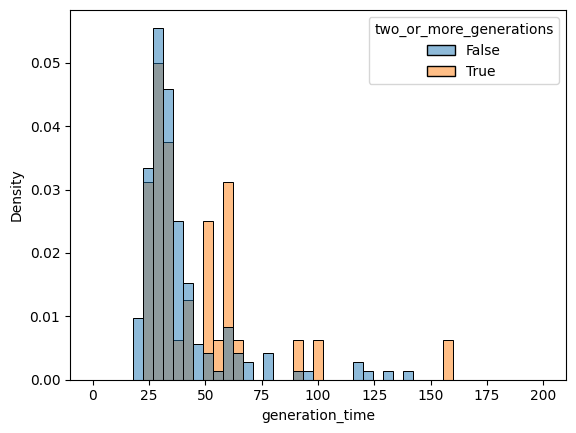

In [ ]:
import seaborn as sns

sns.histplot(res, x="generation_time", hue="two_or_more_generations", stat="density", common_norm=False, binrange=(0, 200))

На графике изображена плотность распределения количества пользователей в зависимости от времени ожидания первой генерации в разбивке по результату (сделано хотя бы 2 генерации или нет).

Можно заметить, что высокая плотность людей с одной генерацией наблюдается при небольшом времени первой модерации. Это может бть связано с тем, что большой блок пользователей достаточно нетерпелив и текст на экране их никак не успокаивает -> они уходят с сервиса. Также это может говорить о низком качестве сгенерерированный рекламы, которая не удовлетворяет запросы пользователей.

Либо же прошло мало времени для того, чтобы пользователь совершил повторную генерацию. В общем, опасно только по этому графику делать какие-то выводы. Нужен A/B-test. Или хотя бы аналогичный график до выкатки фичи.